In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Importing Face Mask Dataset**

In [3]:
# API to fetch the dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# extracting the compressed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data		       kaggle.json  with_mask_2897.jpg
face-mask-dataset.zip  sample_data  without_mask_2969.jpg


**Importing the Dependencies**

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
with_mask_files = os.listdir('/content/data/with_mask')
without_mask_files = os.listdir('/content/data/without_mask')

In [3]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask --> 1

without mask -- > 0

In [4]:
# create the labels
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

labels = with_mask_labels + without_mask_labels

**Image Processing**

1. Resize the Images

2. Convert the Images to numpy arrays

In [5]:
# resize and convert images to mumpy arrays
with_mask_path = '/content/data/with_mask/'
data = []
for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'
for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [6]:
# converting image list and label list to numpy arrays
X = np.array(data)
y= np.array(labels)

**Train Test Split**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [16]:
# scaling the data 
X_train_scaled = X_train/255
X_test_scaled = X_test/255

**Building a Convolutional Neural Network (CNN)** Option 1

In [9]:
import tensorflow as tf
from tensorflow import keras

In [16]:
num_of_classes = 2

model = keras.Sequential()

# Block One
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# Block Two
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# Head
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [17]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [19]:
# training the neural network
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=30)

Epoch 1/30
170/170 [==============================] - 4s 26ms/step - loss: 0.0364 - acc: 0.9882 - val_loss: 0.4304 - val_acc: 0.8942
Epoch 2/30
170/170 [==============================] - 5s 28ms/step - loss: 0.0408 - acc: 0.9891 - val_loss: 0.3220 - val_acc: 0.9355
Epoch 3/30
170/170 [==============================] - 5s 27ms/step - loss: 0.0173 - acc: 0.9936 - val_loss: 0.4030 - val_acc: 0.9306
Epoch 4/30
170/170 [==============================] - 4s 23ms/step - loss: 0.0174 - acc: 0.9921 - val_loss: 0.4185 - val_acc: 0.9273
Epoch 5/30
170/170 [==============================] - 3s 18ms/step - loss: 0.0278 - acc: 0.9899 - val_loss: 0.4755 - val_acc: 0.9273
Epoch 6/30
170/170 [==============================] - 3s 18ms/step - loss: 0.0333 - acc: 0.9880 - val_loss: 0.4309 - val_acc: 0.9190
Epoch 7/30
170/170 [==============================] - 3s 17ms/step - loss: 0.0444 - acc: 0.9849 - val_loss: 0.3121 - val_acc: 0.9256
Epoch 8/30
170/170 [==============================] - 3s 17ms/step - 

**Building a Convolutional Neural Network (CNN)** Option 2

In [10]:
from tensorflow.keras import layers

In [13]:
model = keras.Sequential([
    # Block One
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same',
                  input_shape=[128, 128, 3]),
    layers.MaxPool2D(),

    # Block Two
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Block Three
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Head
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(2, activation='sigmoid'),
])


In [14]:
# compile the neural network
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
# training the neural network
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=30, verbose=0)

**Building a Convolutional Neural Network (CNN) Option 3 (Including L2 Regularization)**


Here, we are adding L2 regularization to the Dense layers with the argument kernel_regularizer=regularizers.l2(0.01). The value of 0.01 is the strength of the regularization, which can be adjusted as needed.

In [11]:
from tensorflow.keras import regularizers

In [17]:
model = keras.Sequential()

 # Block One
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

 # Block Two
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# Head
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(2, activation='sigmoid'))

In [18]:
# compile the neural network
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))
print(y_train.shape)
print(y_test.shape)

(6042, 1)
(1511, 1)


In [24]:
# training the neural network
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=30)

Epoch 1/30
170/170 [==============================] - 4s 20ms/step - loss: 0.3060 - accuracy: 0.9159 - val_loss: 0.3052 - val_accuracy: 0.9207
Epoch 2/30
170/170 [==============================] - 3s 18ms/step - loss: 0.3080 - accuracy: 0.9126 - val_loss: 0.3075 - val_accuracy: 0.9223
Epoch 3/30
170/170 [==============================] - 3s 19ms/step - loss: 0.3080 - accuracy: 0.9200 - val_loss: 0.3226 - val_accuracy: 0.9273
Epoch 4/30
170/170 [==============================] - 3s 18ms/step - loss: 0.2899 - accuracy: 0.9226 - val_loss: 0.2842 - val_accuracy: 0.9372
Epoch 5/30
170/170 [==============================] - 3s 17ms/step - loss: 0.2898 - accuracy: 0.9262 - val_loss: 0.2828 - val_accuracy: 0.9339
Epoch 6/30
170/170 [==============================] - 3s 18ms/step - loss: 0.2895 - accuracy: 0.9259 - val_loss: 0.2828 - val_accuracy: 0.9355
Epoch 7/30
170/170 [==============================] - 3s 18ms/step - loss: 0.2982 - accuracy: 0.9237 - val_loss: 0.2955 - val_accuracy: 0.9339

**Model Evaluation**

In [25]:
loss, accuracy = model.evaluate(X_train_scaled, y_train)
print('Train Accuracy = ', accuracy)

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test Accuracy = ', accuracy)

189/189 [==============================] - 2s 8ms/step - loss: 0.2068 - accuracy: 0.9659
Train Accuracy =  0.9659053087234497
48/48 [==============================] - 0s 8ms/step - loss: 0.3393 - accuracy: 0.9193
Test Accuracy =  0.9192587733268738


In [17]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.head()

,loss,accuracy,val_loss,val_accuracy
0,1.233403,0.805775,0.580462,0.885950
1,0.569101,0.871069,0.472533,0.900826
2,0.473403,0.878426,0.426150,0.884298
3,0.440516,0.875851,0.378348,0.904132
4,0.418152,0.880817,0.366431,0.912397


**Graphics - Option 1**

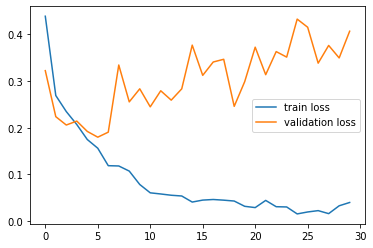

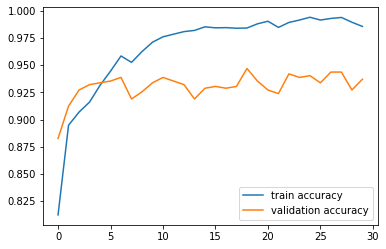

In [22]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Graphics - Option 2**

<AxesSubplot:>

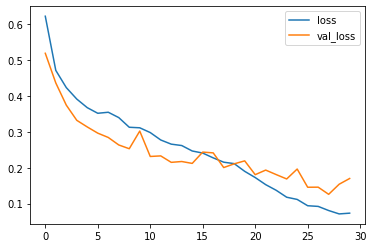

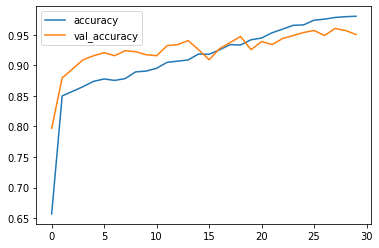

In [28]:
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()

**Graphics - Option 3**

<AxesSubplot:>

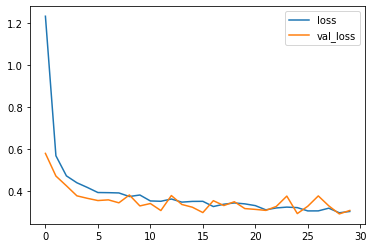

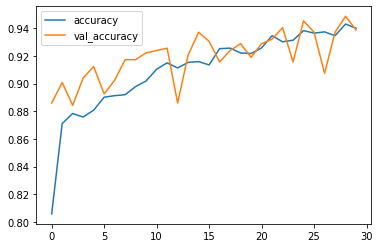

In [18]:
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()

**Predictive System**

Path of the image to be predicted: /content/without_mask_2969.jpg


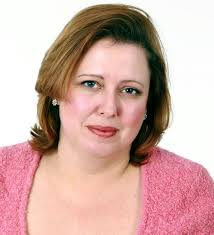

1/1 [==============================] - 0s 21ms/step
[[0.5656471  0.47195584]]
0
The person in the image is not wearing a mask


In [27]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/with_mask_2897.jpg


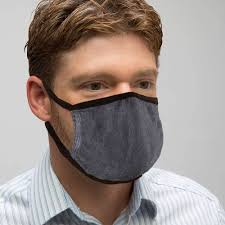

1/1 [==============================] - 0s 21ms/step
[[0.27456608 0.77722955]]
1
The person in the image is wearing a mask


In [28]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')